<a href="https://colab.research.google.com/github/Abhishek-Garg-Ai/Sarcasm-Detection/blob/main/NewsHeadlineSarcasmDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sarcasm Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_json('/content/drive/MyDrive/News Headline Sarcasm/Sarcasm_Headlines_Dataset.json',lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
df=df.drop('article_link',axis=1)

In [ ]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


In [ ]:
df.isna().sum()

is_sarcastic    0
headline        0
dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


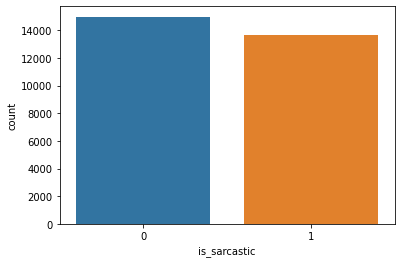

In [ ]:
sns.countplot(df.is_sarcastic)# not sarcastic-->0     sarcastic-->1

#Text Cleaning

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import string 
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)#unwanted words

import re
def clean_text(text):
  final_text=[word for word in text.split() if word.strip().lower() not in stop]
  final_text=' '.join(final_text)
  return re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]',' ',final_text)

In [ ]:
len(stop),list(stop)[:5]

(211, ['any', "'", 'me', "don't", 'and'])

In [ ]:
import re
def clean_text(text):
  final_text=[word for word in text.split() if word.strip().lower() not in stop]
  final_text=' '.join(final_text)
  return re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]',' ',final_text)

In [ ]:
df['headline']=df['headline'].map(clean_text)

In [ ]:
df['headline'][1]

'dem rep  totally nails congress falling short gender  racial equality'

In [ ]:
df

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails congress falling short ...
2,0,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar getting work
4,1,mother comes pretty close using word streamin...
...,...,...
28614,1,jews celebrate rosh hashasha something
28615,1,internal affairs investigator disappointed con...
28616,0,beautiful acceptance speech week came queer ko...
28617,1,mars probe destroyed orbiting spielberg gates ...


#Data Visualizaton for sarcastic

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

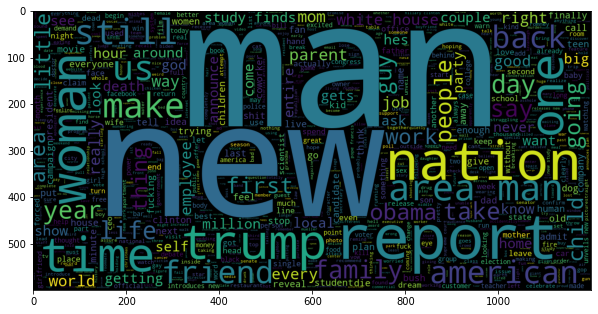

In [ ]:
#Sarcastic
plt.figure(figsize=(10,10))
wc=WordCloud(max_words=1000,width=1200,height=600).generate(' '.join(df[df.is_sarcastic==1].headline))
plt.imshow(wc)

In [ ]:
text_char_len=df[df['is_sarcastic']==1]['headline'].str.len()
text_char_len

0        58
3        44
4        56
7        77
8        63
         ..
28612    34
28614    38
28615    64
28617    57
28618    23
Name: headline, Length: 13634, dtype: int64

In [ ]:
text_word_count=df[df['is_sarcastic']==1]['headline'].str.split().str.len()
text_word_count

0         7
3         6
4         8
7        10
8         9
         ..
28612     6
28614     5
28615     8
28617     7
28618     4
Name: headline, Length: 13634, dtype: int64

In [ ]:
import numpy as np
avg_word_len=df[df['is_sarcastic']==1]['headline'].str.split().apply(lambda x: np.mean([len(i) for i in x]))
avg_word_len

0        7.428571
3        6.500000
4        6.125000
7        6.800000
8        6.111111
           ...   
28612    4.833333
28614    6.800000
28615    7.125000
28617    7.285714
28618    5.000000
Name: headline, Length: 13634, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

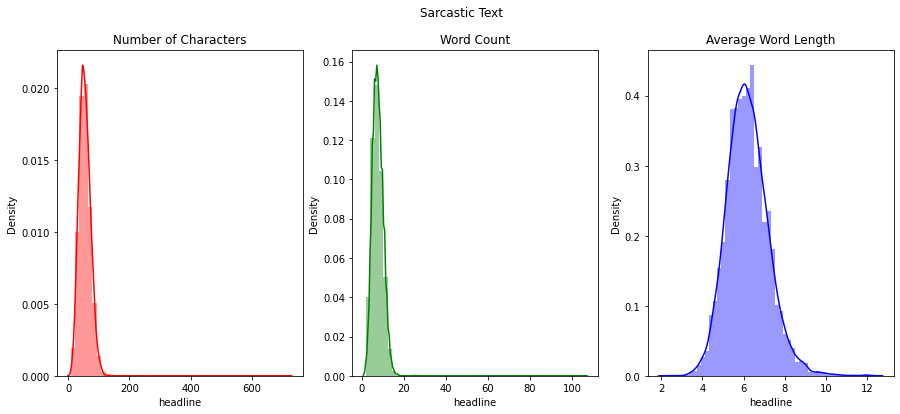

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
text_char_len=df[df['is_sarcastic']==1]['headline'].str.len()
sns.distplot(text_char_len,ax=ax1,color='red')
ax1.set_title('Number of Characters')
text_word_count=df[df['is_sarcastic']==1]['headline'].str.split().str.len()
sns.distplot(text_word_count,ax=ax2,color='green')
ax2.set_title('Word Count')
sns.distplot(avg_word_len,ax=ax3,color='blue')
ax3.set_title('Average Word Length')
fig.suptitle('Sarcastic Text')
fig.subplots_adjust()

#Data Visualizaton for non sarcastic

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

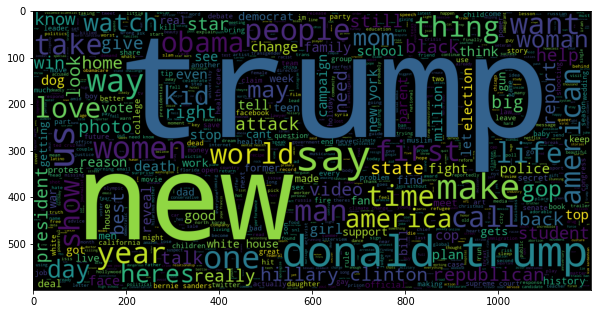

In [ ]:
#Sarcastic
plt.figure(figsize=(10,10))
wc=WordCloud(max_words=1000,width=1200,height=600).generate(' '.join(df[df.is_sarcastic==0].headline))
plt.imshow(wc)

In [ ]:
text_char_len=df[df['is_sarcastic']==0]['headline'].str.len()
text_char_len

1        67
2        43
5        17
6        29
9        26
         ..
28607    47
28608    68
28609    74
28613    49
28616    50
Name: headline, Length: 14985, dtype: int64

In [ ]:
text_word_count=df[df['is_sarcastic']==0]['headline'].str.split().str.len()
text_word_count

1        10
2         6
5         2
6         6
9         4
         ..
28607     7
28608     9
28609    11
28613     7
28616     7
Name: headline, Length: 14985, dtype: int64

In [ ]:
import numpy as np
avg_word_len=df[df['is_sarcastic']==0]['headline'].str.split().apply(lambda x: np.mean([len(i) for i in x]))
avg_word_len

1        5.800000
2        6.333333
5        8.000000
6        4.000000
9        5.750000
           ...   
28607    5.857143
28608    6.666667
28609    5.818182
28613    6.142857
28616    6.285714
Name: headline, Length: 14985, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

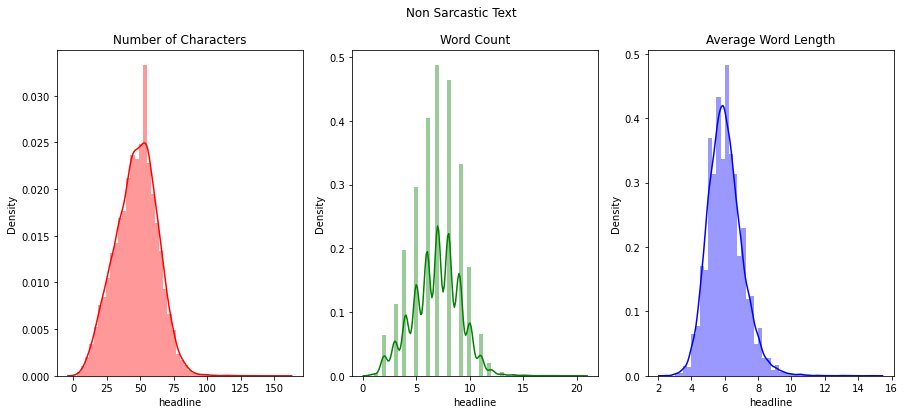

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,6))
sns.distplot(text_char_len,ax=ax1,color='red')
ax1.set_title('Number of Characters')
sns.distplot(text_word_count,ax=ax2,color='green')
ax2.set_title('Word Count')
sns.distplot(avg_word_len,ax=ax3,color='blue')
ax3.set_title('Average Word Length')
fig.suptitle('Non Sarcastic Text')
fig.subplots_adjust()

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_headline,test_headline,y_train,y_test=train_test_split(df.headline.values,df.is_sarcastic,random_state=5,test_size=0.25,stratify=df.is_sarcastic)
train_headline.shape,test_headline.shape,y_train.shape,y_test.shape

((21464,), (7155,), (21464,), (7155,))

In [ ]:
test_headline[0]

'life curfews kids'

#Tokenization And Sequencing

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_headline)

In [ ]:
import pickle
# saving
with open('/content/drive/MyDrive/News Headline Sarcasm/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
# loading
with open('/content/drive/MyDrive/News Headline Sarcasm/tokenizer.pickle', 'rb') as handle:
    tokenizer=pickle.load(handle)

In [ ]:
tokenized_train=tokenizer.texts_to_sequences(train_headline)
len(tokenizer.word_index),tokenized_train[:5]

(23135,
 [[3044, 638, 133, 7247, 1274],
  [3633, 873, 421, 3045, 260, 5166, 9211, 5167],
  [22, 1167, 3046, 1, 5168, 9212, 62, 70, 780, 12815],
  [5169, 1, 5984, 12816],
  [541, 5985, 1117, 4019, 5170, 453, 1168, 620, 112]])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
train_sequence=pad_sequences(tokenized_train,maxlen=20,padding='pre')
train_sequence[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 3044,  638,  133, 7247, 1274],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 3633,  873,  421, 3045,  260, 5166, 9211, 5167]],
      dtype=int32)

In [ ]:
tokenizer.word_index['life'],tokenizer.word_index['kids']

(19, 94)

In [ ]:
tokenized_test=tokenizer.texts_to_sequences(test_headline)
test_sequence=pad_sequences(tokenized_test,maxlen=20,padding='pre')
test_sequence[:2],test_headline[0]#curfews is not available in train vocab

(array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,   19,   94],
        [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0, 8050, 2598, 2757, 2017]],
       dtype=int32), 'life curfews kids')

#Model

##Word2VecModel

In [ ]:
train_words=[headline.split() for headline in train_headline]
print(train_words[:2])

[['microsoft', 'amazon', 'plan', 'driverless', 'cars'], ['closed', 'door', 'meeting', 'determine', 'future', 'honey', 'roasted', 'peanuts']]


In [ ]:
import gensim 
embed_dim=100
w2v_model=gensim.models.Word2Vec(sentences=train_words,window=3,size=embed_dim,min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

23135

In [ ]:
w2v_model.most_similar('clock')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('radio', 0.9876656532287598),
 ('guys', 0.9874483346939087),
 ('is', 0.987343430519104),
 ('studio', 0.9873290061950684),
 ('square', 0.987234890460968),
 ('veteran', 0.9871562123298645),
 ('longer', 0.9871418476104736),
 ('interview', 0.9870842695236206),
 ('career', 0.9870774149894714),
 ('meet', 0.9870306253433228)]

In [ ]:
import numpy as np

#weight matrix from word2vec genism model
def get_weight_matrix(model,vocab):
  #define weight matrix dimensions with all 0
  weight_matrix=np.zeros((len(vocab)+1,embed_dim))
  for word,i in vocab.items():
    weight_matrix[i]=model[word]
  return weight_matrix
embed_vectors=get_weight_matrix(w2v_model,tokenizer.word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
embed_vectors.shape,embed_vectors[1]

((23136, 100),
 array([ 0.32786947,  0.14001018,  0.12106467,  0.74185896,  0.05186272,
        -1.4568249 , -0.64448029,  1.00940657, -0.16903992,  1.0426178 ,
         0.33232528,  2.07347202, -0.17621134,  0.80762947,  0.97383118,
         1.25078905,  0.06351314,  1.42555821,  0.72634864,  0.01045095,
        -0.02751291,  0.25125155, -0.17951521, -0.94774687, -1.78335071,
        -0.23283271, -0.94661498, -0.14275438,  0.36476445, -1.14297199,
         0.12901944,  0.85354513,  0.2920453 , -0.62290192, -1.41565526,
         0.28610128,  0.46865535,  1.12514675, -0.32597163, -0.86849803,
         0.27798629, -0.63406688,  1.76803851,  0.35529438, -1.02074742,
         0.43676752, -0.39344984, -2.20178318, -0.69472331, -0.60109007,
         1.1920445 , -0.70294172,  0.72469074,  0.37920466,  0.76662868,
         0.48111799,  1.24458063,  0.28558657, -1.30062115,  0.37661281,
        -1.03626418, -0.71289945, -1.41935515, -0.09025849,  1.18021154,
        -1.50900078, -1.12481451, -0

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten,Bidirectional,LSTM
from keras import optimizers

In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

23136

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=embed_dim,weights=[embed_vectors],input_length=20,trainable=True))
model.add(Bidirectional(LSTM(units=64,recurrent_dropout=0.3,dropout=0.2,return_sequences=True)))
model.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.3,dropout=0.2,return_sequences=True)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 100)           2313600   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 128)           84480     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 256)           263168    
_________________________________________________________________
flatten (Flatten)            (None, 5120)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1310976   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 3,972,481
Trainable params: 3,972,481
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(optimizer=optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/News Headline Sarcasm/Temp/Word2VecModel1.h5', monitor='val_accuracy', verbose=1, save_best_only=True,
                                 mode='auto')

In [ ]:
model.fit(train_sequence,y_train,epochs=15,validation_data=(test_sequence,y_test),batch_size=128,callbacks=[checkpoint])

Epoch 1/15
168/168 [==============================] - 96s 360ms/step - loss: 0.6160 - accuracy: 0.6269 - val_loss: 0.4173 - val_accuracy: 0.8057

Epoch 00001: val_accuracy improved from -inf to 0.80573, saving model to /content/drive/MyDrive/News Headline Sarcasm/Temp/Word2VecModel1.h5
Epoch 2/15
168/168 [==============================] - 57s 337ms/step - loss: 0.2431 - accuracy: 0.9014 - val_loss: 0.4600 - val_accuracy: 0.8088

Epoch 00002: val_accuracy improved from 0.80573 to 0.80881, saving model to /content/drive/MyDrive/News Headline Sarcasm/Temp/Word2VecModel1.h5
Epoch 3/15
168/168 [==============================] - 58s 342ms/step - loss: 0.1053 - accuracy: 0.9612 - val_loss: 0.6087 - val_accuracy: 0.8035

Epoch 00003: val_accuracy did not improve from 0.80881
Epoch 4/15
168/168 [==============================] - 56s 335ms/step - loss: 0.0482 - accuracy: 0.9833 - val_loss: 0.8274 - val_accuracy: 0.7871

Epoch 00004: val_accuracy did not improve from 0.80881
Epoch 5/15
168/168 [=

###Evaluation 

In [ ]:
import keras
model=keras.models.load_model('/content/drive/MyDrive/News Headline Sarcasm/Temp/Word2VecModel1.h5')

In [ ]:
model.evaluate(test_sequence,y_test)

224/224 [==============================] - 17s 22ms/step - loss: 0.4600 - accuracy: 0.8088


[0.46001672744750977, 0.8088050484657288]

In [ ]:
y_train_pred=model.predict(train_sequence)
y_test_pred=model.predict(test_sequence)

In [ ]:
y_train_pred.shape,y_test_pred.shape

((21464, 1), (7155, 1))

In [ ]:
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/Word2Vec_train_pred.npy',y_train_pred)
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/Word2Vec_test_pred.npy',y_test_pred)

##Glove Model

###Downloading Glove Model

In [ ]:
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip

--2021-07-18 08:25:19--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2021-07-18 08:25:19--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-07-18 08:25:19--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [ ]:
!unzip glove*.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [ ]:
!ls
!pwd

drive  glove.840B.300d.txt  sample_data
/content


In [ ]:
f = open('glove.840B.300d.txt', encoding='utf-8')
for line in f:
  lt=line.split()
  print(lt[:len(lt)-300],lt[-300:])
  break

[','] ['-0.082752', '0.67204', '-0.14987', '-0.064983', '0.056491', '0.40228', '0.0027747', '-0.3311', '-0.30691', '2.0817', '0.031819', '0.013643', '0.30265', '0.0071297', '-0.5819', '-0.2774', '-0.062254', '1.1451', '-0.24232', '0.1235', '-0.12243', '0.33152', '-0.006162', '-0.30541', '-0.13057', '-0.054601', '0.037083', '-0.070552', '0.5893', '-0.30385', '0.2898', '-0.14653', '-0.27052', '0.37161', '0.32031', '-0.29125', '0.0052483', '-0.13212', '-0.052736', '0.087349', '-0.26668', '-0.16897', '0.015162', '-0.0083746', '-0.14871', '0.23413', '-0.20719', '-0.091386', '0.40075', '-0.17223', '0.18145', '0.37586', '-0.28682', '0.37289', '-0.16185', '0.18008', '0.3032', '-0.13216', '0.18352', '0.095759', '0.094916', '0.008289', '0.11761', '0.34046', '0.03677', '-0.29077', '0.058303', '-0.027814', '0.082941', '0.1862', '-0.031494', '0.27985', '-0.074412', '-0.13762', '-0.21866', '0.18138', '0.040855', '-0.113', '0.24107', '0.3657', '-0.27525', '-0.05684', '0.34872', '0.011884', '0.14517',

In [ ]:
from tqdm import tqdm
import numpy as np
embeddings_index = {}
f = open('glove.840B.300d.txt', encoding='utf-8')
for line in tqdm(f):
    values = line.split()
    word = ' '.join(values[0:len(values)-300])
    try:
      coefs = np.asarray(values[-300:], dtype='float32')
      embeddings_index[word] = coefs
    except Exception as e:
      print(line)
      print(e)
      break
f.close()

print('Found %s word vectors.' % len(embeddings_index))


0it [00:00, ?it/s]
1286it [00:00, 12849.17it/s]
2643it [00:00, 13056.04it/s]
3893it [00:00, 12882.29it/s]
5255it [00:00, 13095.00it/s]
6580it [00:00, 13140.15it/s]
7876it [00:00, 13083.46it/s]
9211it [00:00, 13160.58it/s]
10471it [00:00, 12985.34it/s]
11697it [00:00, 12729.74it/s]
12955it [00:01, 12683.44it/s]
14189it [00:01, 12400.09it/s]
15470it [00:01, 12520.06it/s]
16734it [00:01, 12553.74it/s]
18037it [00:01, 12692.86it/s]
19299it [00:01, 12669.41it/s]
20587it [00:01, 12729.44it/s]
21879it [00:01, 12784.53it/s]
23156it [00:01, 12575.47it/s]
24492it [00:01, 12800.20it/s]
25864it [00:02, 13060.89it/s]
27172it [00:02, 12776.76it/s]
28453it [00:02, 12551.69it/s]
29711it [00:02, 12193.53it/s]
31037it [00:02, 12494.34it/s]
32307it [00:02, 12553.39it/s]
33566it [00:02, 12549.21it/s]
34886it [00:02, 12736.49it/s]
36162it [00:02, 12463.88it/s]
37512it [00:02, 12756.83it/s]
38842it [00:03, 12914.80it/s]
40208it [00:03, 13128.77it/s]
41524it [00:03, 12960.00it/s]
42823it [00:03, 12703.71it/

Found 2195895 word vectors.


In [ ]:
import pickle as pkl
pkl.dump(embeddings_index,open('/content/drive/MyDrive/News Headline Sarcasm/glove.840B.300d.embedding_index.pkl','wb'))

###Creating our model

In [ ]:
import pickle as pkl
glove_word_embedding=pkl.load(open('/content/drive/MyDrive/News Headline Sarcasm/glove.6B.100d.embedding_index.pkl','rb'))

In [ ]:
import numpy as np
def get_weight_matrix(embedding,vocab):
  vocab_size=len(vocab)+1
  weight_matrix=np.zeros((vocab_size,100))
  count=0
  for word,i in vocab.items():
    try:
      weight_matrix[i]=embedding[word]
    except:
      count+=1
      # print(word)
  print(count)
  return weight_matrix

In [ ]:
embed_vectors=get_weight_matrix(glove_word_embedding,tokenizer.word_index)

763


In [ ]:
embed_vectors.shape,embed_vectors[1]

((23136, 100),
 array([ 0.13739   ,  0.77890998,  0.80053997,  0.13819   , -0.49792001,
        -0.26126999, -0.15175   ,  0.17185999, -0.68418998,  0.50189   ,
         0.44672   ,  0.19672   , -0.42576   ,  0.55474001, -0.77960002,
         0.030827  , -0.059211  , -0.61663002,  0.13206001,  0.82722998,
         0.61584002, -0.48458999,  0.14517   ,  0.79995   ,  0.086049  ,
         0.80483001,  0.075896  ,  0.22578999,  0.44444999, -0.13345   ,
         0.47720999,  0.90728998, -0.16137999,  0.57347   ,  0.4535    ,
         0.18978   ,  0.71152002, -0.34663999, -0.21165   ,  0.43244001,
        -0.019109  , -0.33871001,  0.64225   , -0.16962001,  0.041451  ,
         0.33926001, -0.88621002,  0.37560001,  0.59881997, -0.46830001,
         0.25760001,  0.17253   ,  0.4267    ,  0.60778999, -0.68080997,
        -2.00430012, -0.012919  ,  0.26172   ,  1.27929997, -0.039175  ,
        -0.49851999, -0.43505999, -0.40485001, -0.35258001,  0.89916003,
         0.57682002, -0.014539  ,  0

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten,Bidirectional,LSTM,Dropout
from keras import optimizers

In [ ]:
vocab_size=len(tokenizer.word_index)+1
embed_dim=100
vocab_size

23136

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=embed_dim,weights=[embed_vectors],input_length=20,trainable=True))
model.add(Bidirectional(LSTM(units=64,recurrent_dropout=0.4,dropout=0.2,return_sequences=True)))
model.add(Bidirectional(LSTM(units=128,recurrent_dropout=0.3,dropout=0.3,return_sequences=True)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 100)           2313600   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 20, 128)           84480     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 20, 256)           263168    
_________________________________________________________________
flatten_3 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               1310976   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer=optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/News Headline Sarcasm/Temp/GloveModel2.h5', monitor='val_accuracy', verbose=1, save_best_only=True,
                                 mode='auto')

In [ ]:
model.fit(train_sequence,y_train,epochs=10,validation_data=(test_sequence,y_test),batch_size=128,callbacks=[checkpoint])

Epoch 1/10
168/168 [==============================] - 74s 354ms/step - loss: 0.5767 - accuracy: 0.6922 - val_loss: 0.4736 - val_accuracy: 0.7646

Epoch 00001: val_accuracy improved from -inf to 0.76464, saving model to /content/drive/MyDrive/News Headline Sarcasm/Temp/GloveModel2.h5
Epoch 2/10
168/168 [==============================] - 57s 337ms/step - loss: 0.3952 - accuracy: 0.8191 - val_loss: 0.3909 - val_accuracy: 0.8228

Epoch 00002: val_accuracy improved from 0.76464 to 0.82278, saving model to /content/drive/MyDrive/News Headline Sarcasm/Temp/GloveModel2.h5
Epoch 3/10
168/168 [==============================] - 57s 340ms/step - loss: 0.2916 - accuracy: 0.8749 - val_loss: 0.4092 - val_accuracy: 0.8319

Epoch 00003: val_accuracy improved from 0.82278 to 0.83187, saving model to /content/drive/MyDrive/News Headline Sarcasm/Temp/GloveModel2.h5
Epoch 4/10
168/168 [==============================] - 57s 340ms/step - loss: 0.2102 - accuracy: 0.9158 - val_loss: 0.4025 - val_accuracy: 0.83

###Evaluation 

In [ ]:
import keras
model=keras.models.load_model('/content/drive/MyDrive/News Headline Sarcasm/Temp/GloveModel1.h5')

In [ ]:
model.evaluate(test_sequence,y_test)

224/224 [==============================] - 9s 23ms/step - loss: 0.5023 - accuracy: 0.8365


[0.5022712349891663, 0.8364779949188232]

In [ ]:
y_train_pred=model.predict(train_sequence)
y_test_pred=model.predict(test_sequence)

In [ ]:
y_train_pred.shape,y_test_pred.shape

((21464, 1), (7155, 1))

In [ ]:
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/Glove_train_pred.npy',y_train_pred)
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/Glove_test_pred.npy',y_test_pred)

##BERT Model

In [ ]:
!pip install sentence_transformers

     |████████████████████████████████| 92kB 5.3MB/s 
     |████████████████████████████████| 2.5MB 27.4MB/s 
     |████████████████████████████████| 1.2MB 51.2MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 3.3MB 19.7MB/s 
     |████████████████████████████████| 901kB 45.7MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-cp37-none-any.whl size=126711 sha256=0d002af1c2705c7dd71abefccc891def71ffeb3b0fb8e6664e7085b590eafc31
  Stored in directory: /root/.cache/pip/wheels/38/d2/98/d191289a877a34c68aa67e05179521e060f96394a3e9336be6
Successfully built sentence-transformers
ERROR: transformers 4.8.2 has requirement huggingface-hub==0.0.12, but you'll have huggingface-hub 0.0.14 which is incompatible.


In [ ]:
import numpy as np
import pickle as pkl
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

model = SentenceTransformer("distilbert-base-uncased-finetuned-sst-2-english")

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.weight', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_embedding(texts):
  embeddings=[]
  for text in tqdm(texts):
    text_embed=model.encode(text)
    embeddings.append(text_embed)
  return np.array(embeddings)
train_embeddings=get_embedding(train_headline)
test_embeddings=get_embedding(test_headline)

100%|██████████| 7155/7155 [00:48<00:00, 147.63it/s]


In [ ]:
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/distilbert_train_embedding.npy',train_embeddings)
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/distilbert_test_embedding.npy',test_embeddings)

In [ ]:
train_embeddings.shape,test_embeddings.shape

((21464, 768), (7155, 768))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,InputLayer
from keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(768,),activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(28,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(28,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               98432     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 28)                3612      
_________________________________________________________________
dropout_3 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/News Headline Sarcasm/Temp/BertBestModel2.h5', monitor='val_accuracy', verbose=1, save_best_only=True,
                                 mode='auto')

In [ ]:
model.fit(train_embeddings,y_train,epochs=100,validation_data=(test_embeddings,y_test),batch_size=128,callbacks=[checkpoint])

Epoch 1/100
168/168 [==============================] - 1s 4ms/step - loss: 0.3109 - accuracy: 0.8672 - val_loss: 0.4682 - val_accuracy: 0.8029

Epoch 00001: val_accuracy did not improve from 0.80349
Epoch 2/100
168/168 [==============================] - 1s 4ms/step - loss: 0.3107 - accuracy: 0.8675 - val_loss: 0.4705 - val_accuracy: 0.8017

Epoch 00002: val_accuracy did not improve from 0.80349
Epoch 3/100
168/168 [==============================] - 1s 4ms/step - loss: 0.3171 - accuracy: 0.8636 - val_loss: 0.4620 - val_accuracy: 0.8032

Epoch 00003: val_accuracy did not improve from 0.80349
Epoch 4/100
168/168 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.8693 - val_loss: 0.4700 - val_accuracy: 0.8032

Epoch 00004: val_accuracy did not improve from 0.80349
Epoch 5/100
168/168 [==============================] - 1s 4ms/step - loss: 0.3125 - accuracy: 0.8674 - val_loss: 0.4758 - val_accuracy: 0.7994

Epoch 00005: val_accuracy did not improve from 0.80349
Epoch

###Evaluation 

In [ ]:
import numpy as np
train_embeddings=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/distilbert_train_embedding.npy','rb'))
test_embeddings=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/distilbert_test_embedding.npy','rb'))
train_embeddings.shape,test_embeddings.shape

((21464, 768), (7155, 768))

In [ ]:
import keras
model=keras.models.load_model('/content/drive/MyDrive/News Headline Sarcasm/Temp/BertBestModel1.h5')

In [ ]:
model.evaluate(test_embeddings,y_test)

224/224 [==============================] - 1s 2ms/step - loss: 0.5120 - accuracy: 0.8027


[0.5120174288749695, 0.8026554584503174]

In [ ]:
y_train_pred=model.predict(train_embeddings)
y_test_pred=model.predict(test_embeddings)

In [ ]:
y_train_pred.shape,y_test_pred.shape

((21464, 1), (7155, 1))

In [ ]:
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/Bert_train_pred.npy',y_train_pred)
np.save('/content/drive/MyDrive/News Headline Sarcasm/Temp/Bert_test_pred.npy',y_test_pred)

##Final Model

In [ ]:
import numpy as np
word2vec_train_pred=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/Word2Vec_train_pred.npy','rb'))
word2vec_test_pred=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/Word2Vec_test_pred.npy','rb'))
glove_train_pred=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/Glove_train_pred.npy','rb'))
glove_test_pred=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/Glove_test_pred.npy','rb'))
bert_train_pred=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/Bert_train_pred.npy','rb'))
bert_test_pred=np.load(open('/content/drive/MyDrive/News Headline Sarcasm/Temp/Bert_test_pred.npy','rb'))
print(word2vec_train_pred.shape,glove_train_pred.shape,bert_train_pred.shape,y_train.shape)
print(word2vec_test_pred.shape,glove_test_pred.shape,bert_test_pred.shape,y_test.shape)

(21464, 1) (21464, 1) (21464, 1) (21464,)
(7155, 1) (7155, 1) (7155, 1) (7155,)


In [ ]:
X_final_train=np.concatenate((word2vec_train_pred,glove_train_pred,bert_train_pred),axis=1)
X_final_test=np.concatenate((word2vec_test_pred,glove_test_pred,bert_test_pred),axis=1)
X_final_train.shape,X_final_test.shape

((21464, 3), (7155, 3))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras import regularizers

In [ ]:
model=Sequential()
model.add(Dense(3,input_shape=(3,),activation='tanh'))
model.add(Dense(16,input_shape=(3,),activation='tanh',kernel_regularizer=regularizers.L2(0.3)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L2(0.2)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(8,activation='tanh',kernel_regularizer=regularizers.L2(0.2)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_54 (Dense)             (None, 16)                64        
_________________________________________________________________
dropout_29 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)              

In [ ]:
model.compile(optimizer=Adam(learning_rate=2e-3),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint=ModelCheckpoint('/content/drive/MyDrive/News Headline Sarcasm/Temp/FinalModel1.h5',
                           save_best_only=True,monitor='val_accuracy',mode='auto',verbose=1)

In [ ]:
model.fit(X_final_train,y_train,epochs=50,validation_data=(X_final_test,y_test),batch_size=128,callbacks=[checkpoint])

Epoch 1/50
168/168 [==============================] - 1s 4ms/step - loss: 0.0678 - accuracy: 0.9899 - val_loss: 0.7356 - val_accuracy: 0.8506

Epoch 00001: val_accuracy did not improve from 0.85381
Epoch 2/50
168/168 [==============================] - 1s 4ms/step - loss: 0.0702 - accuracy: 0.9904 - val_loss: 0.6634 - val_accuracy: 0.8514

Epoch 00002: val_accuracy did not improve from 0.85381
Epoch 3/50
168/168 [==============================] - 1s 4ms/step - loss: 0.0674 - accuracy: 0.9904 - val_loss: 0.8386 - val_accuracy: 0.8510

Epoch 00003: val_accuracy did not improve from 0.85381
Epoch 4/50
168/168 [==============================] - 1s 4ms/step - loss: 0.0666 - accuracy: 0.9903 - val_loss: 0.8611 - val_accuracy: 0.8526

Epoch 00004: val_accuracy did not improve from 0.85381
Epoch 5/50
168/168 [==============================] - 1s 4ms/step - loss: 0.0635 - accuracy: 0.9900 - val_loss: 0.8688 - val_accuracy: 0.8481

Epoch 00005: val_accuracy did not improve from 0.85381
Epoch 6/50

In [ ]:
0.85535